## The following notebook contains code for obtaining correlation plots

KPBS - potassium phosphate buffer saline, aCSF - artificial cerebrospinal fluid, HSA - human serum albumin, HDX-MS - hydrogen-deuterium-exchange mass spectrometry.

#### Datasets used
- Raw HDX state data 

#### Workflow
- Import raw HDX data to compare three conditions pairwise

#### Output
- Transformed data to sum all the updake values across time points and compare conditions pairwise
- Correlation plots

#### Here we compare 
- KPBS vs aCSF
- KPBS vs aCSF HSA
- aCSF vs aCSF HSA

### Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as stat
import os

import matplotlib as mpl 
import matplotlib.patches as mpatches
import matplotlib.colors as mc 
import statistics as stat

### Define paths

In [2]:
data_path = os.path.dirname(os.getcwd()) + '/data'
figure_path = os.path.dirname(os.getcwd()) + '/figures'

### Import data

In [3]:
#df = pd.read_csv(data_path + '/20231218 NFL repeat B HDX state.csv' , sep=',', engine='python')

In [4]:
df = pd.read_csv(data_path + '/hdx_state_data.csv' , sep=',', engine='python')

In [5]:
df

,Protein,Start,End,Sequence,Modification,Fragment,MaxUptake,MHP,State,Exposure,Center,Center SD,Uptake,Uptake SD,RT,RT SD
0,NFL_HUMAN,2,16,SSFSYEPYYSTSYKR,NaN,NaN,13.0,1864.8388,KPBS,0.000000,1865.431589,0.016348,0.000000,0.000000,9.665626,0.007216
1,NFL_HUMAN,2,16,SSFSYEPYYSTSYKR,NaN,NaN,13.0,1864.8388,KPBS,1.000000,1865.647200,0.038267,0.215611,0.041613,9.660820,0.001772
2,NFL_HUMAN,2,16,SSFSYEPYYSTSYKR,NaN,NaN,13.0,1864.8388,KPBS,10.000000,1865.419819,0.217734,-0.011770,0.218347,9.690996,0.026699
3,NFL_HUMAN,2,16,SSFSYEPYYSTSYKR,NaN,NaN,13.0,1864.8388,KPBS,60.000004,1866.188106,0.218092,0.756516,0.218704,9.643005,0.014917
4,NFL_HUMAN,2,16,SSFSYEPYYSTSYKR,NaN,NaN,13.0,1864.8388,KPBS,120.000008,1866.501439,0.008668,1.069849,0.018504,9.644643,0.009199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,NFL_HUMAN,538,543,AAKKKD,NaN,NaN,5.0,660.4039,aCSF HSA,1.000000,661.420946,0.146323,0.723279,0.146403,8.879354,0.019153
3110,NFL_HUMAN,538,543,AAKKKD,NaN,NaN,5.0,660.4039,aCSF HSA,10.000000,661.891329,0.286181,1.193663,0.286222,8.835733,0.048820
3111,NFL_HUMAN,538,543,AAKKKD,NaN,NaN,5.0,660.4039,aCSF HSA,60.000004,662.040819,0.015168,1.343153,0.015925,8.869267,0.020466
3112,NFL_HUMAN,538,543,AAKKKD,NaN,NaN,5.0,660.4039,aCSF HSA,120.000008,662.000369,0.137852,1.302703,0.137937,8.851036,0.035731


# Preprocessing Step-1

### Transforming the dataset and calculating summed uptake values

In [6]:
df['Exposure'] = df['Exposure'].round().astype(int)
df['State_TP'] = df['State'] + '-' + df['Exposure'].astype(str)
df = df[['Start', 'End', 'Sequence', 'State_TP', 'Uptake']]
df

,Start,End,Sequence,State_TP,Uptake
0,2,16,SSFSYEPYYSTSYKR,KPBS-0,0.000000
1,2,16,SSFSYEPYYSTSYKR,KPBS-1,0.215611
2,2,16,SSFSYEPYYSTSYKR,KPBS-10,-0.011770
3,2,16,SSFSYEPYYSTSYKR,KPBS-60,0.756516
4,2,16,SSFSYEPYYSTSYKR,KPBS-120,1.069849
...,...,...,...,...,...
3109,538,543,AAKKKD,aCSF HSA-1,0.723279
3110,538,543,AAKKKD,aCSF HSA-10,1.193663
3111,538,543,AAKKKD,aCSF HSA-60,1.343153
3112,538,543,AAKKKD,aCSF HSA-120,1.302703


In [7]:
# Pivot the DataFrame
transformed_df = df.pivot_table(index=['Sequence', 'Start', 'End'], 
                                columns='State_TP', values='Uptake').reset_index()

In [8]:
transformed_df

State_TP,Sequence,Start,End,KPBS-0,KPBS-1,KPBS-10,KPBS-120,KPBS-240,KPBS-60,aCSF HSA-0,...,aCSF HSA-10,aCSF HSA-120,aCSF HSA-240,aCSF HSA-60,aCSF-0,aCSF-1,aCSF-10,aCSF-120,aCSF-240,aCSF-60
0,AAEDATNEKQALQG,149,162,0.0,4.465834,4.453787,5.592434,5.747744,4.589414,0.0,...,2.499575,3.232446,4.907543,2.977908,0.0,3.047322,5.191704,5.712445,5.164893,5.936409
1,AAEDATNEKQALQGEREGL,149,167,0.0,1.465079,4.819651,7.865205,8.584465,7.254339,0.0,...,7.502758,7.619240,7.315807,7.717061,0.0,4.510758,7.512689,8.082318,7.570875,7.883077
2,AAEEEEA,491,497,0.0,2.427679,2.445950,2.726564,2.781427,2.442359,0.0,...,1.280362,1.279574,1.754076,1.419781,0.0,1.052053,1.228106,1.470929,1.522041,0.982909
3,AAEEEEAAKEESE,491,503,0.0,6.248794,6.189614,6.642571,6.286227,6.238215,0.0,...,2.867011,2.791621,3.292907,2.620477,0.0,2.751270,2.544245,2.715963,2.522607,2.584428
4,AAEEEEAAKEESEE,491,504,0.0,7.004214,6.933422,6.905667,6.879220,6.866856,0.0,...,2.916418,3.191784,2.682885,2.913426,0.0,3.064186,2.870444,3.032344,2.946104,2.886790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,YTSHVQE,443,449,0.0,1.675756,1.705587,1.760833,1.775887,1.708304,0.0,...,0.710713,0.747650,0.761809,0.740732,0.0,0.702603,0.688423,0.723267,0.732382,0.713327
169,YTSHVQEE,443,450,0.0,1.915762,1.953397,2.036634,2.051293,1.954152,0.0,...,0.799001,0.858356,0.733828,0.835577,0.0,0.804543,0.769876,0.896677,0.883415,0.803035
170,YTSHVQEEQ,443,451,0.0,2.473708,2.531426,2.626604,2.642799,2.542148,0.0,...,1.056361,1.139488,1.172576,1.134967,0.0,1.028194,1.004946,1.108426,1.066043,1.038065
171,YTSHVQEEQIE,443,453,0.0,3.299760,3.355863,3.527594,3.542942,3.362587,0.0,...,1.357865,1.916393,1.570002,1.463073,0.0,1.361252,1.422621,1.604725,1.669197,1.505337


In [9]:
#transformed_df.to_csv(data_path + '/transformed_data.csv', index=False)
final_df = pd.read_csv(data_path + '/transformed_data.csv')
final_df = final_df.sort_values(by=['Start', 'End'], ascending=[True, True])

# KPBS vs aCSV

In [10]:
df = final_df.copy()
df['1'] = df['aCSF-1'] - df['KPBS-1']
df['10'] = df['aCSF-10'] - df['KPBS-10'] 
df['60'] = df['aCSF-60'] - df['KPBS-60']
df['120'] = df['aCSF-120'] - df['KPBS-120']
df['240'] = df['aCSF-240'] - df['KPBS-240']
df['Sum'] = df['1'] + df['10'] + df['60'] + df['120'] + df['240']
df = df[['Start', 'End', 'Sequence', '1', '10', '60', '120', '240', 'Sum']]
KPBS_aCSF = df.copy()

In [11]:
KPBS_aCSF

,Start,End,Sequence,1,10,60,120,240,Sum
141,2,16,SSFSYEPYYSTSYKR,-0.142885,1.445963,2.333188,3.214337,3.317974,10.168577
146,5,21,SYEPYYSTSYKRRYVET,-2.931630,-2.966951,-2.886164,-2.683300,-2.646268,-14.114313
115,8,21,PYYSTSYKRRYVET,-2.610265,-2.589048,-2.468583,-2.320347,-2.339878,-12.328121
172,9,25,YYSTSYKRRYVETPRVH,-1.872535,-4.169315,-4.466612,-4.580492,-4.918332,-20.007286
144,11,21,STSYKRRYVET,-2.317485,-2.153325,-2.058904,-2.042934,-2.120389,-10.693037
...,...,...,...,...,...,...,...,...,...
62,516,527,EGEETKEAEEEE,-2.852823,-2.877399,-2.770424,-2.657472,-3.021706,-14.179824
75,517,522,GEETKE,-1.672191,-1.459720,-1.467843,-1.429691,-1.788592,-7.818037
56,526,543,EEKKVEGAGEEQAAKKKD,-3.783155,-3.931101,-3.964757,-3.802968,-3.869017,-19.350998
59,531,541,EGAGEEQAAKK,0.090094,0.047875,-0.063461,0.863838,0.880109,1.818455


# Correlation analysis 

In [28]:
corr_df = KPBS_aCSF.copy()
corr_df = corr_df[['1', '10', '60', '120', '240']]
corr_df = corr_df.reset_index()
corr_df = corr_df.drop('index', axis=1)
corr_df = corr_df.groupby(np.arange(len(corr_df))//5).mean()
transposed_df = corr_df.T
correlation_matrix = transposed_df.corr()

In [13]:
transposed_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,-1.460462,-1.417311,-1.635582,-0.610605,-0.083278,0.575015,-0.546890,0.171869,-0.339818,-0.227055,-0.216711,-0.302004,-0.684887,-3.705125,-2.313767,-2.247482,-2.590054,-1.851079
10,-1.432351,-1.495210,-1.800350,-0.497846,0.116577,1.056796,0.098088,0.397789,-0.024986,-0.445535,-0.215558,-0.209704,-0.851816,-3.983770,-2.388013,-2.330159,-2.633287,-1.860644
60,-1.299658,-1.399682,-1.833168,-0.141950,0.234486,0.523391,0.311733,0.214300,0.162333,-0.543147,-0.400420,-0.363508,-1.304546,-3.930779,-2.411073,-2.319951,-2.676626,-2.102799
120,-1.301474,-1.258311,-1.826699,-0.113933,0.267589,0.225728,0.264933,0.053038,0.123686,-0.680524,-0.640349,-0.286247,-1.353871,-3.949047,-2.486950,-2.387510,-2.575532,-1.638322
240,-1.505677,-1.894120,-2.051462,-0.161610,0.088546,-0.373883,0.112298,-0.426436,-0.144332,-0.920310,-1.052512,-0.640873,-1.502442,-4.155499,-2.543980,-2.415240,-2.770485,-1.496079


In [14]:
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

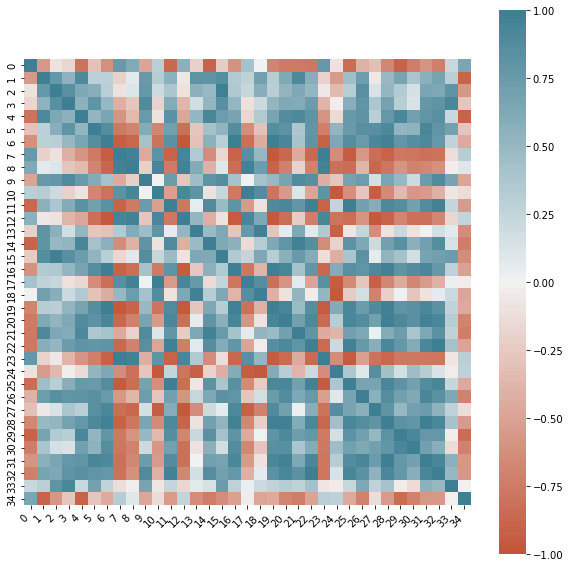

In [29]:
fig = plt.figure(figsize=(10, 10))

ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

fig.savefig(figure_path + '/correlations_KPBS_aCSF_wo_magnitude.png', dpi=600, bbox_inches='tight')

In addition to color, we’ve added size as a parameter to our heatmap. The size of each square corresponds to the magnitude of the correlation it represents, that is size(c1, c2) ~ abs(corr(c1, c2))
Source code for the figure: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

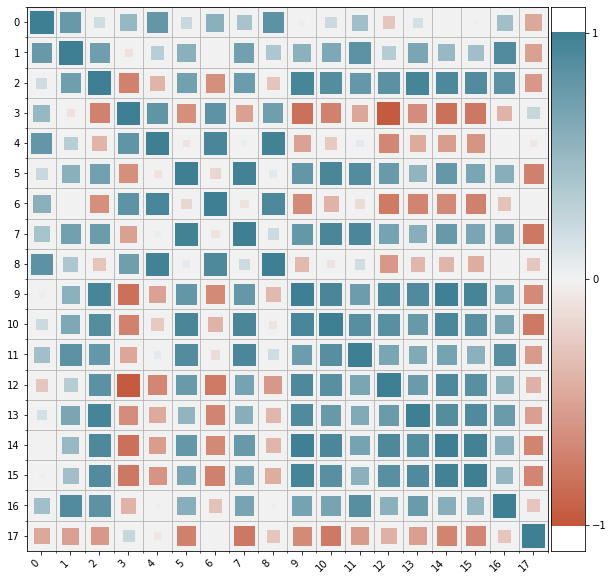

In [16]:
fig = plt.figure(figsize=(10, 10))
corrplot(correlation_matrix)
fig.savefig(figure_path + '/correlations_KPBS_aCSF.png', dpi=600, bbox_inches='tight')

In [17]:
# Half-correlation plots below

In [18]:
# # figure settings
# sns.set(font_scale=0.8)
# mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))
# sns.set_style(style="white")

# fig, ax = plt.subplots(figsize=(18, 18))
# cmap = sns.diverging_palette(20, 220, as_cmap=True)
# sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax,
#             xticklabels=True, yticklabels=True);

# fig.savefig(figure_path + '/correlations_KPBS_aCSF.png', dpi=600, bbox_inches='tight')

# KPBS vs aCSF HSA

In [33]:
df = final_df.copy()
df['1'] = df['aCSF HSA-1'] - df['KPBS-1']
df['10'] = df['aCSF HSA-10'] - df['KPBS-10'] 
df['60'] = df['aCSF HSA-60'] - df['KPBS-60']
df['120'] = df['aCSF HSA-120'] - df['KPBS-120']
df['240'] = df['aCSF HSA-240'] - df['KPBS-240']
df['Sum'] = df['1'] + df['10'] + df['60'] + df['120'] + df['240']
df = df[['Start', 'End', 'Sequence', '1', '10', '60', '120', '240', 'Sum']]
KPBS_aCSFHSA = df.copy()

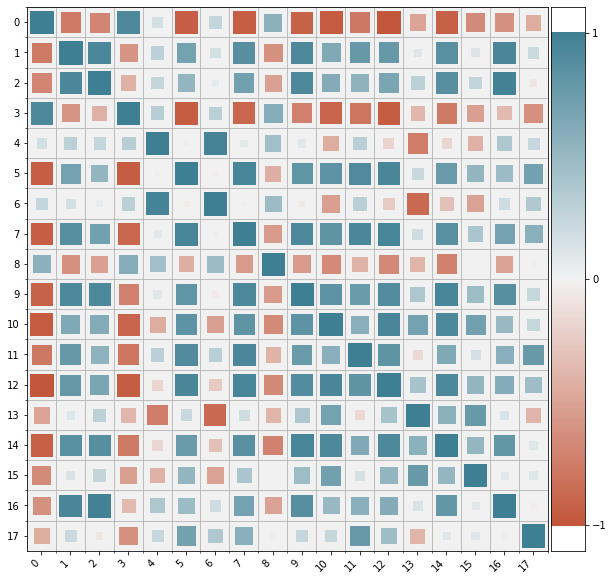

In [34]:
corr_df = KPBS_aCSFHSA.copy()
corr_df = corr_df[['1', '10', '60', '120', '240']]
corr_df = corr_df.reset_index()
corr_df = corr_df.drop('index', axis=1)
corr_df = corr_df.groupby(np.arange(len(corr_df))//10).mean()
transposed_df = corr_df.T
correlation_matrix = transposed_df.corr()

# Plot
fig = plt.figure(figsize=(10, 10))
corrplot(correlation_matrix)
fig.savefig(figure_path + '/correlations_KPBS_aCSFHSA.png', dpi=600, bbox_inches='tight')

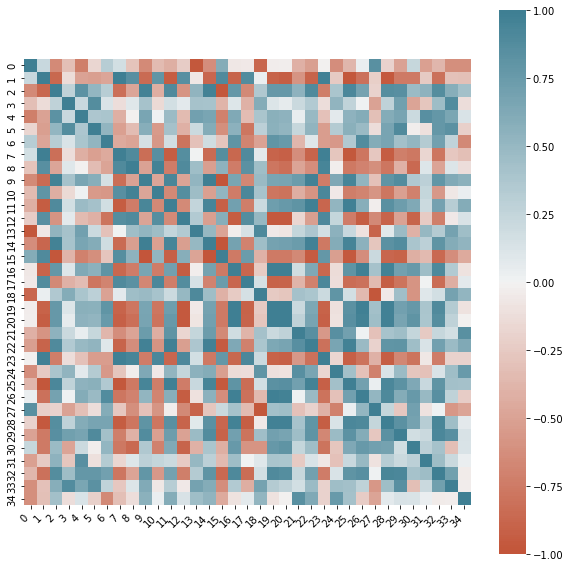

In [32]:
fig = plt.figure(figsize=(10, 10))

ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

fig.savefig(figure_path + '/correlations_KPBS_aCSFHSA_wo_magnitude.png', dpi=600, bbox_inches='tight')

# aCSF vs aCSF HSA

In [35]:
df = final_df.copy()
df['1'] = df['aCSF HSA-1'] - df['aCSF-1']
df['10'] = df['aCSF HSA-10'] - df['aCSF-10'] 
df['60'] = df['aCSF HSA-60'] - df['aCSF-60']
df['120'] = df['aCSF HSA-120'] - df['aCSF-120']
df['240'] = df['aCSF HSA-240'] - df['aCSF-240']
df['Sum'] = df['1'] + df['10'] + df['60'] + df['120'] + df['240']
df = df[['Start', 'End', 'Sequence', '1', '10', '60', '120', '240', 'Sum']]
aCSF_aCSFHSA = df.copy()

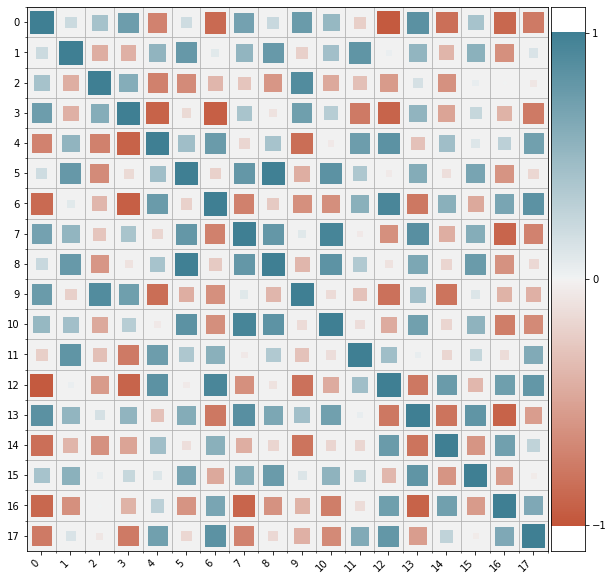

In [38]:
corr_df = aCSF_aCSFHSA.copy()
corr_df = corr_df[['1', '10', '60', '120', '240']]
corr_df = corr_df.reset_index()
corr_df = corr_df.drop('index', axis=1)
corr_df = corr_df.groupby(np.arange(len(corr_df))//10).mean()
transposed_df = corr_df.T
correlation_matrix = transposed_df.corr()

fig = plt.figure(figsize=(10, 10))
corrplot(correlation_matrix)
fig.savefig(figure_path + '/correlations_aCSF_aCSFHSA.png', dpi=600, bbox_inches='tight')

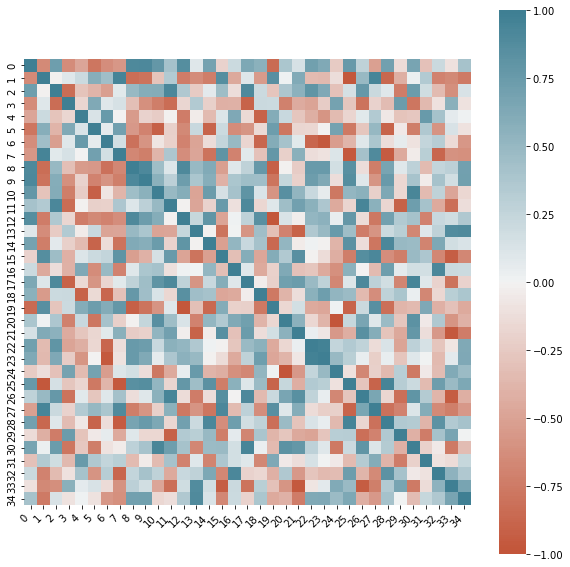

In [37]:
fig = plt.figure(figsize=(10, 10))

ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

fig.savefig(figure_path + '/correlations_aCSF_aCSFHSA_wo_magnitude.png', dpi=600, bbox_inches='tight')